In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#! https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/

In [3]:
df = sns.load_dataset("iris")

In [4]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


B!: Seperate by class '\n'
B2: Summarize dataset '\n'
B3: Summarize data by class
B4: Gaussian Probability Density Function
B5: Class Probabilities


In [99]:
def seperate_by_class(df):
    '''
    return dict(label, vector[i])
    '''
    seperated = dict()
    for i in range(len(df)):
        vector = df[i] #! vecto o dong thu i 
        class_value = vector[-1]
        if class_value not in seperated:
            seperated[class_value] = list()
        seperated[class_value].append(vector)
    
    return seperated

In [17]:

dataset = [[3.393533211,2.331273381,0],
 [3.110073483,1.781539638,0],
 [1.343808831,3.368360954,0],
 [3.582294042,4.67917911,0],
 [2.280362439,2.866990263,0],
 [7.423436942,4.696522875,1],
 [5.745051997,3.533989803,1],
 [9.172168622,2.511101045,1],
 [7.792783481,3.424088941,1],
 [7.939820817,0.791637231,1]]

seperated = seperate_by_class(dataset)
for label in seperated:
    print(label)
    for row in seperated[label]:
        print(row)

0
[3.393533211, 2.331273381, 0]
[3.110073483, 1.781539638, 0]
[1.343808831, 3.368360954, 0]
[3.582294042, 4.67917911, 0]
[2.280362439, 2.866990263, 0]
1
[7.423436942, 4.696522875, 1]
[5.745051997, 3.533989803, 1]
[9.172168622, 2.511101045, 1]
[7.792783481, 3.424088941, 1]
[7.939820817, 0.791637231, 1]


In [21]:
dataset = np.array(dataset)

In [25]:
dataset[:,2]

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

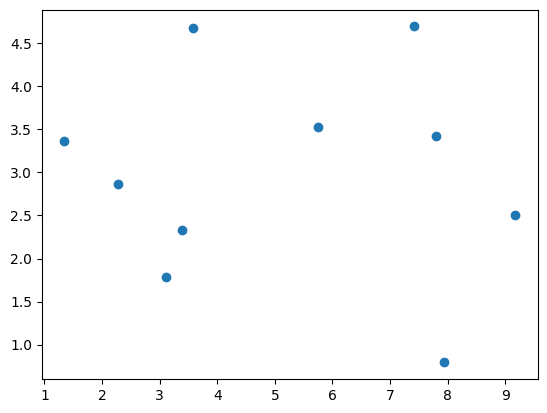

In [26]:
plt.scatter(x=dataset[:,0],y=dataset[:,1])

In [107]:
def my_sum(number):
    res = 0
    for i in number:
        res = res + i
    return res

In [108]:
def mean_my(number):
  return (my_sum(number))/len(number)

In [109]:
mean_my([1,2,3,4,5])

3.0

In [110]:
import math

def standart_deviation(number):
    sum_new = 0
    for i in range(len(number)):
        sum_new = sum_new + (number[i] - mean_my(number))**2
    return math.sqrt((sum_new)/float(len(number)-1))

In [102]:
def summarize_dataset(dataset):
    '''
    zip(a,b): (a1,b1), (a2,b2)
    zip(*dataset): seperate list of list to list each row
    
    return (mean,stdev,col_number)
    '''
    summarize_new = [(mean_my(column),standart_deviation(column),len(column)) for column in zip(*dataset)]
    del(summarize_new[-1])
    return summarize_new

In [103]:
summary = summarize_dataset(dataset=dataset)
print(summary)

[(5.178333386499999, 2.7665845055177263, 10), (2.9984683241, 1.218556343617447, 10)]


In [93]:
def calculate_probability(x,mean,stdev):
    '''
    return Gausian probability distribution function of x. 
    '''
    exponent = math.exp(-((x-mean)**2 / (2*stdev**2)))
    return (1/(math.sqrt(2*math.pi) * stdev)) * exponent

In [94]:
print(calculate_probability(1.0, 1.0, 1.0))
print(calculate_probability(2.0, 1.0, 1.0))
print(calculate_probability(0.0, 1.0, 1.0))

0.3989422804014327
0.24197072451914337
0.24197072451914337


In [100]:
def summarize_by_class(dataset):
    '''
    return dict(label,summarizedataset(mean,stdev,col_number))
    '''
    seperated = seperate_by_class(dataset)
    summarise = dict()
    for label, row in seperated.items():
        summarise[label] = summarize_dataset(row)
    return summarise

In [101]:
summarize_by_class(dataset=dataset)

{0.0: [(2.7420144012, 0.9265683289298018, 5),
  (3.0054686692, 1.1073295894898725, 5)],
 1.0: [(7.6146523718, 1.2344321550313704, 5),
  (2.9914679790000003, 1.4541931384601618, 5)]}

In [111]:
def calculate_class_probability(summaries, row):
    total_row = my_sum([summaries[label[0][2]] for label in summaries])
    proba = dict()
    for label, class_summaries in summaries.items():
        proba[label] = summaries[label][0][2]/float(total_row) #! xac suat cua class
        for i in len(class_summaries):
            mean, stdev,_ = class_summaries[i]
            proba[label] *= calculate_probability(row[i],mean,stdev)
    return proba
        

In [113]:
dataset = [[3.393533211,2.331273381,0],
 [3.110073483,1.781539638,0],
 [1.343808831,3.368360954,0],
 [3.582294042,4.67917911,0],
 [2.280362439,2.866990263,0],
 [7.423436942,4.696522875,1],
 [5.745051997,3.533989803,1],
 [9.172168622,2.511101045,1],
 [7.792783481,3.424088941,1],
 [7.939820817,0.791637231,1]]
summaries = summarize_by_class(dataset)
# probabilities = calculate_class_probability(summaries, dataset[0])
# print(probabilities)